Pontifícia Universidade Católica de São Paulo 

`Ciência de Dados e Inteligência Artificial`

🎓 Aula 3 - Data Wrangling

---
> 👨‍🏫*Professor Rooney Coelho (rracoelho@pucsp.br)*
---



Nesta prática faremos a análise dos dados da Covid19 no Brasil até o momento. Algumas células estão preenchidas para auxiliar na leitura dos dados. Faça o que se pede.

In [3]:
# Bibliotecas utilizadas
import pandas as pd

Extraia os dados baixados de https://covid.saude.gov.br/

Criar uma lista de `Dataframes`. Estamos aqui fazendo um casting para tornar a coluna de datas em um formato específico de datas do Python ao invés de texto. Também se colocou a coluna de data como o índice.

In [4]:
lista_df = []

anos = (2020, 2021, 2022)

for ano in anos:
    for parte in (1,2):
        arq = f'HIST_PAINEL_COVIDBR_{ano}_Parte{parte}_17ago2022.csv'
        print(f'lendo o arquivo {arq}')
        lista_df.append(pd.read_csv(arq, sep=';', parse_dates=['data'], index_col=['data']) )


lendo o arquivo HIST_PAINEL_COVIDBR_2020_Parte1_17ago2022.csv
lendo o arquivo HIST_PAINEL_COVIDBR_2020_Parte2_17ago2022.csv
lendo o arquivo HIST_PAINEL_COVIDBR_2021_Parte1_17ago2022.csv
lendo o arquivo HIST_PAINEL_COVIDBR_2021_Parte2_17ago2022.csv
lendo o arquivo HIST_PAINEL_COVIDBR_2022_Parte1_17ago2022.csv
lendo o arquivo HIST_PAINEL_COVIDBR_2022_Parte2_17ago2022.csv


Faça aqui o concatenamento das linhas dos `dataframes` da lista em um `dataframe` único. 

In [5]:
df = pd.concat(lista_df)

Nosso objetivo é mostrar somente os valores a nível de Brasil. Faça um filtro das linhas baseado na coluna `regiao` somente para a correspondência `Brasil`. Salve este filtro em um `Dataframe`.

In [6]:
df_brasil = df[df['regiao'] == 'Brasil']

Selecione somente as colunas 'casosAcumulado', 'casosNovos', 'obitosAcumulado', 'obitosNovos' do `Dataframe` e descarte as demais.

In [7]:
df_brasil_casos = df_brasil[['casosAcumulado', 'casosNovos', 'obitosAcumulado', 'obitosNovos']]

Faça aqui o gráfico de 'casosAcumulado' ao longo dos dias desde o começo da pandemia.

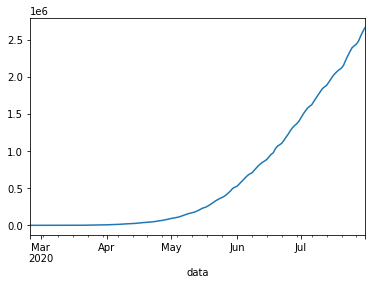

In [9]:
df_brasil_casos['casosAcumulado'].plot();

Faça aqui o gráfico de 'obitosAcumulado' ao longo dos dias desde o começo da pandemia.

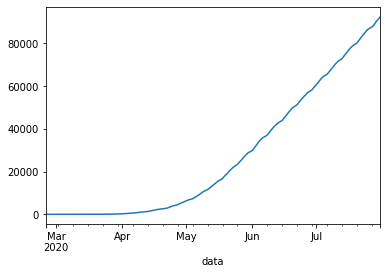

In [10]:
df_brasil_casos['obitosAcumulado'].plot();

Qual a quantidade total de óbitos por Covid19 no Brasil a partir da análise desses dados?

In [11]:
df_brasil_casos['obitosAcumulado'].sum()

4298911

Crie uma coluna com a media móvel dos 'casosNovos' e 'obitosNovos'. Use uma janela de 7 dias para o cálculo da média móvel.

Use o seguinte exemplo como referência para calcular a média móvel.

```python

df['nomeColuna'].rolling(Janela).mean()
```

In [31]:
import warnings
warnings.filterwarnings('ignore')

df_brasil_casos['casosNovos_media'] = df_brasil_casos['casosNovos'].rolling(7).mean()
df_brasil_casos['obitosNovos_media'] = df_brasil_casos['obitosNovos'].rolling(7).mean()

Faça um gráfico da evolução dos casos e sua média móvel. Use a coluna 'casosNovos' para a evolução diária de casos e a coluna referente à média móvel de casos que você calculou.

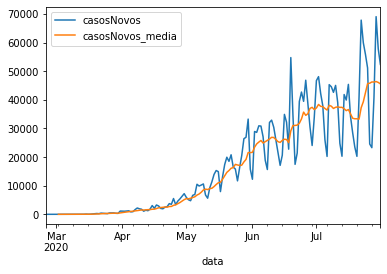

In [13]:
df_brasil_casos[['casosNovos', 'casosNovos_media']].plot();

Faça um gráfico da evolução dos óbitos e sua média móvel. Use a coluna 'obitosNovos' para a evolução diária de óbitos e a coluna referente à média móvel de óbitos que você calculou.

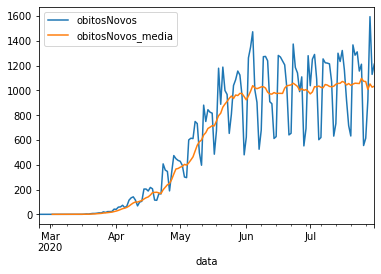

In [14]:
df_brasil_casos[['obitosNovos', 'obitosNovos_media']].plot();

Qual o dia com o maior registro de óbitos e qual é esse valor?

In [26]:
df_brasil_casos.query('obitosAcumulado == obitosAcumulado.max()').index.values

array(['2020-07-31T00:00:00.000000000'], dtype='datetime64[ns]')

Qual o dia com a maior média móvel de óbitos e qual é esse valor?

In [27]:
df_brasil_casos.query('obitosNovos_media == obitosNovos_media.max()').index.values

array(['2020-07-25T00:00:00.000000000'], dtype='datetime64[ns]')